<a href="https://colab.research.google.com/github/bhavyabetha/AIML_BATCH-10/blob/main/Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the data

In [10]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Display the count of credit approvals done by company

In [12]:
print("Following is a breakup of credit approval status.\n 1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

Following is a breakup of credit approval status.
 1 means approved credit, 0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


## Histogram of FICO scores by credit approval status

Text(0.5, 0, 'FICO score')

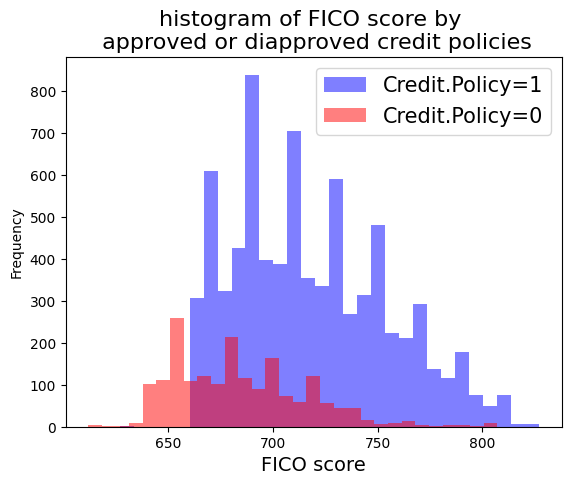

In [14]:
df[df['credit.policy']==1] ['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='Credit.Policy=1')
df[df['credit.policy']==0] ['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title("histogram of FICO score by \n approved or diapproved credit policies",fontsize=16)
plt.xlabel("FICO score",fontsize=14)

# presence or absence of statistical difference of various factors between credit approval status

Text(0, 0.5, 'Interest rate')

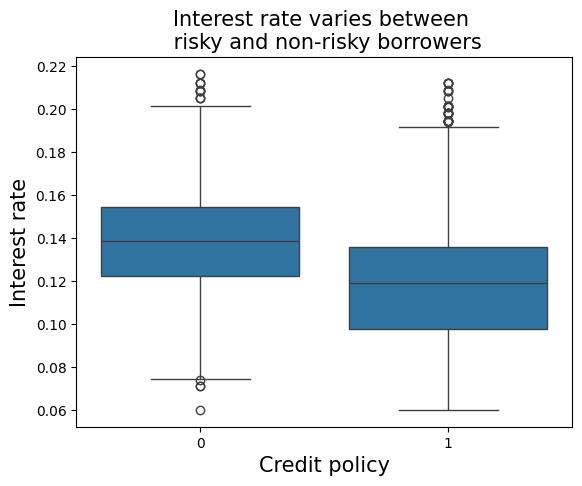

In [16]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between \n risky and non-risky borrowers",fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

# Countplot of loans by purpose, with the color hue defined  by not.fully.paid

Text(0.5, 0, 'Purpose')

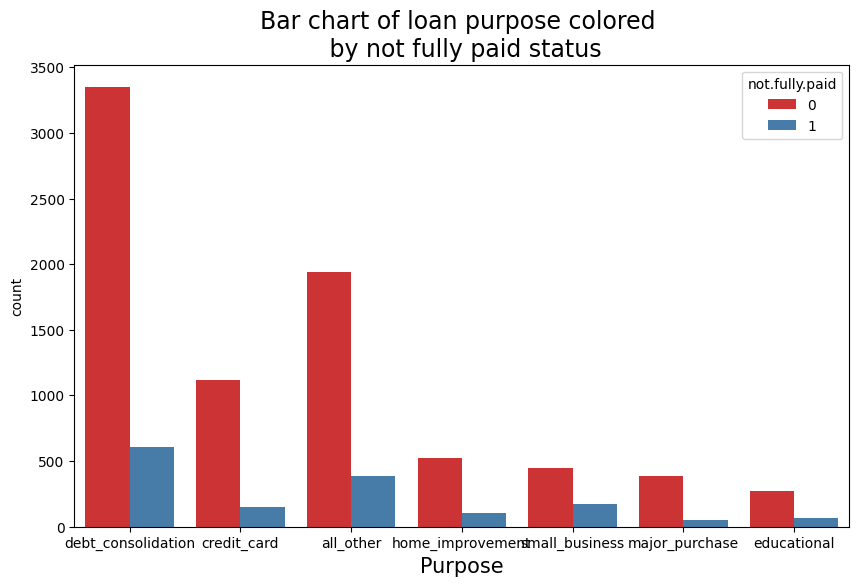

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored \n by not fully paid status",fontsize=17)
plt.xlabel("Purpose",fontsize=15)

**# Setting up the data**

Categorical Features

In [19]:
df_final=pd.get_dummies(df,['purpose'],drop_first=True)

In [20]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


Train test split

In [27]:
from sklearn.model_selection import train_test_split
X=df_final.drop('not.fully.paid',axis=1)
y=df_final['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# Training a Decision tree model

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=None)

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and evaluation of decision tree

In [32]:
predictions=dtree.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2428
           1       0.24      0.27      0.25       446

    accuracy                           0.75      2874
   macro avg       0.55      0.56      0.55      2874
weighted avg       0.77      0.75      0.76      2874



**create an instancce of the randomforestclassifier class and fitit to out training data from the previous step**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc=RandomForestClassifier(n_estimators=600)

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [48]:
rfc_pred=rfc.predict(X_test)

In [49]:
cr=classification_report(y_test,rfc_pred)

In [50]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2428
           1       0.50      0.02      0.05       446

    accuracy                           0.84      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.84      0.78      2874

